In [2]:
import pandas as pd 
import numpy as np
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

This cell imports several Python libraries such as pandas, numpy, fuzz, matplotlib, seaborn, warnings, re, plotly.express, plotly.graph_objs, plotly.figure_factory, and Counter from the collections module.


It also sets the warning filter to ignore any warnings that may occur while running the code. The %matplotlib inline command allows for plots to be displayed directly in the Jupyter notebook.

In [6]:
df = pd.read_csv('/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv')

 # **Top 5 des meilleures catégories.**

In [22]:
df['listed_in'].value_counts().nlargest(5).to_frame()

,count
listed_in,
"Animation, Comedy, Family",124
"Action-Adventure, Animation, Comedy",77
"Action-Adventure, Animation, Kids",45
"Action-Adventure, Animation, Family",40
"Animals & Nature, Documentary, Family",40


This cell is performing an operation on the DataFrame object df that will return a new DataFrame object containing the top 5 values in the "listed_in" column, along with their respective counts.

Here is a breakdown of what the code is doing:
 
* **df['listed_in']:** This extracts the "listed_in" column from the DataFrame object df.

* **.value_counts():** This counts the number of times each unique value appears in the "listed_in" column.
 
* **.nlargest(5):** This returns the top 5 values in the column, based on their counts.
 
* **.to_frame():** This converts the resulting Series object into a DataFrame object.

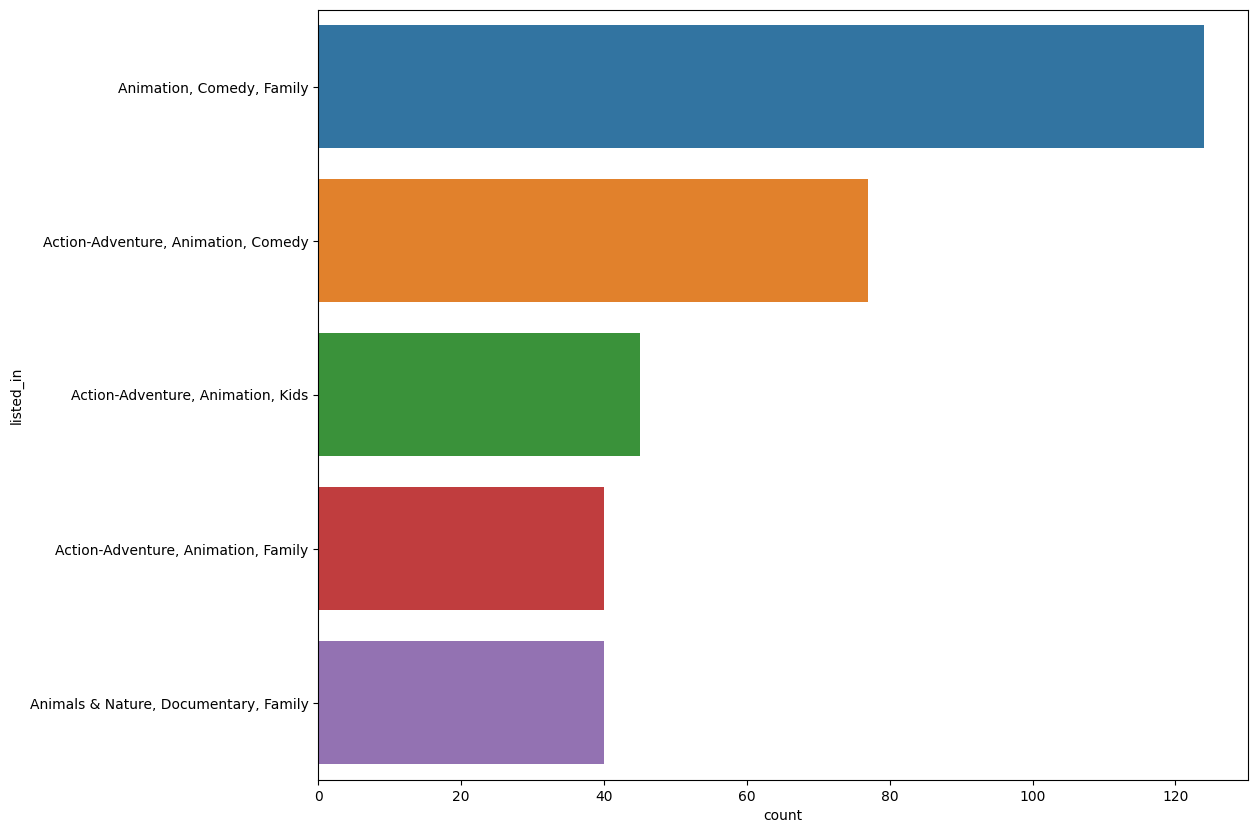

In [25]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="listed_in", data=df, order=df.listed_in.value_counts().index[0:5])

This cell creates a countplot using the seaborn library to visualize the frequency distribution of values in the "listed_in" column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **plt.figure(figsize=(12,10)):** This sets the size of the figure that will display the countplot.

* **sns.countplot(y="listed_in", data=df, order=df.listed_in.value_counts().index[0:5]):** This creates the countplot by specifying the "listed_in" column as the variable to count and the DataFrame object df as the data source. The order parameter is used to sort the categories in descending order based on their frequency counts. The top 5 categories are selected using the index[0:5] slice.

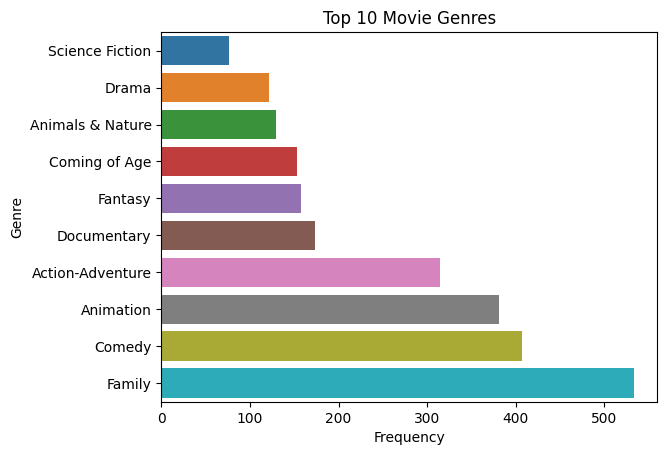

In [15]:
d1 = df[df['type'] == "Movie"]
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(10)
counter_list = counter_list[::-1]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]
sns.barplot(x=values, y=labels)
plt.title("Top 10 Movie Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

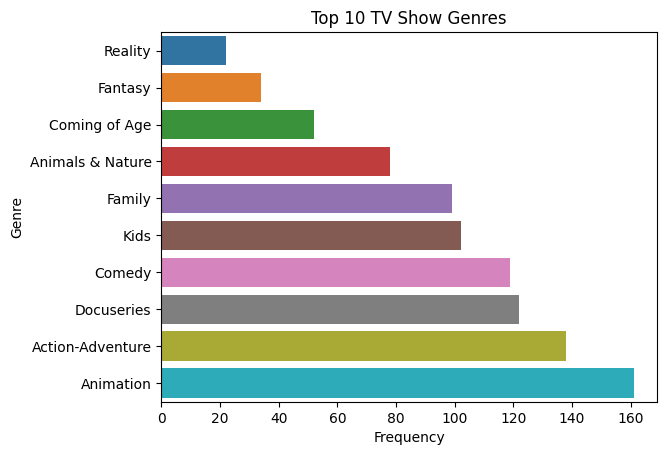

In [13]:
d1 = df[df['type'] == "TV Show"]
categories = ", ".join(d1['listed_in']).split(", ")
counter_list = Counter(categories).most_common(10)
counter_list = counter_list[::-1]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]
sns.barplot(x=values, y=labels)
plt.title("Top 10 TV Show Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

 # **Top 5 des réalisateurs.**


In [16]:
df['director'].value_counts().nlargest(5).to_frame()

,count
director,
Jack Hannah,17
John Lasseter,16
Paul Hoen,16
Robert Stevenson,12
Charles Nichols,12


This cell is performing an operation on the DataFrame object df that will return a new DataFrame object containing the top 5 values in the "director" column, along with their respective counts.

Here is a breakdown of what the code is doing:

* **df['director']:** This extracts the "director" column from the DataFrame object df.

* **.value_counts():** This counts the number of times each unique value appears in the "director" column.

* **.nlargest(5):** This returns the top 5 values in the column, based on their counts.

* **.to_frame():** This converts the resulting Series object into a DataFrame object.

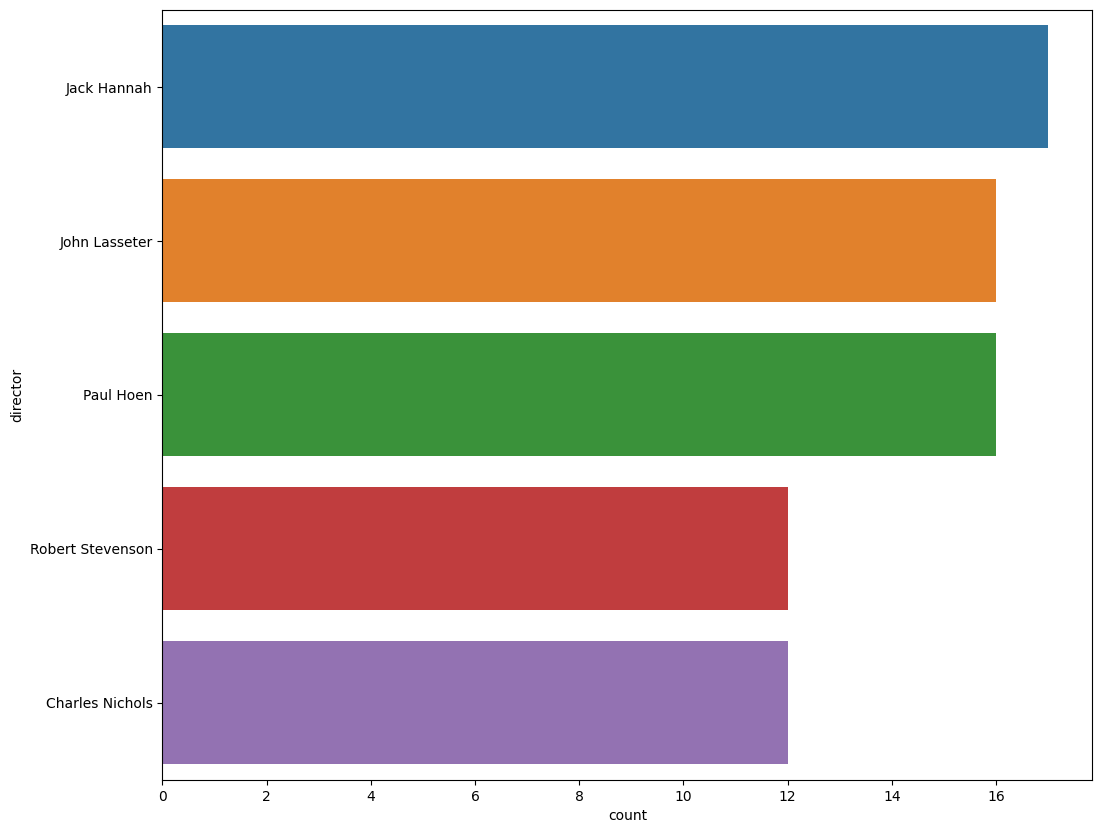

In [17]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="director", data=df, order=df.director.value_counts().index[0:5])

This cell creates a countplot using the seaborn library to visualize the frequency distribution of values in the "director" column of the DataFrame object df.

Here is a breakdown of what the code is doing:

* **plt.figure(figsize=(12,10)):** This sets the size of the figure that will display the countplot.

* **sns.countplot(y="director", data=df, order=df.director.value_counts().index[0:5]):** This creates the countplot by specifying the "director" column as the variable to count and the DataFrame object df as the data source. The order parameter is used to sort the directors in descending order based on their frequency counts. The top 5 directors are selected using the index[0:5] slice.

# **Top 10 des acteurs**

In [18]:
actors=df['cast'].str.split(',', expand=True).stack()
actors.value_counts().nlargest(10).to_frame()

,count
Jim Cummings,24
Corey Burton,15
Walt Disney,15
Jeff Bennett,14
Tress MacNeille,14
Bill Farmer,14
Keith Ferguson,14
Wallace Shawn,13
Russi Taylor,12
Larry the Cable Guy,12


This cell creates a DataFrame containing the top 10 most frequently appearing actors/actresses in the "cast" column of the DataFrame object df.

Here's a breakdown of the code:

* **actors=df['cast'].str.split(',', expand=True).stack():** creates a new DataFrame called actors by splitting the strings in the "cast" column of the df DataFrame on commas and stacking the resulting columns on top of each other. This creates a single column of all the actors/actresses in the dataset.

* **actors.value_counts().nlargest(10).to_frame():** calls the value_counts() method on the actors Series to count the frequency of occurrence of each actor/actress and returns the top 10 most common ones as a DataFrame. The resulting DataFrame has one column, which contains the actor/actress names, and one row for each actor/actress, with the number of occurrences in the second column.

# **Les caractéristiques textuelles**

In [21]:
Drama_df = df[df["listed_in"]=="Drama"]
similar_content = []
for i1, row1 in Drama_df.iterrows():
    for i2, row2 in Drama_df.iterrows():
        if i2 > i1 and fuzz.ratio(row1['description'], row2['description']) > 50:
            similar_content_pair = (row1['title'], row2['title'])
            similar_content.append(similar_content_pair)
similar_content

[]

This cell compares the similarity of descriptions between pairs of movies or TV shows in the largest category "Drama" using the FuzzyWuzzy library.

Here's a breakdown of the code:

* **Drama_df = df[df["listed_in"]=="Drama"]:** creates a new DataFrame called Drama_df that contains only the rows from the original df DataFrame where the "listed_in" column is "Drama".

* **similar_content = []:** initializes an empty list to store pairs of similar content.

* **for i1, row1 in Drama_df.iterrows():** iterates over each row in Drama_df, assigning the index and values of each row to the variables i1 and row1, respectively.

* **for i2, row2 in Drama_df.iterrows():** nested within the first loop, iterates over each row in Drama_df again, assigning the index and values of each row to the variables i2 and row2, respectively.

* **if i2 > i1 and fuzz.ratio(row1['description'], row2['description']) > 50:** checks whether the index of the second row is greater than the index of the first row (to avoid comparing the same pair of rows twice) and whether the FuzzyWuzzy score between the "description" columns of the two rows is greater than 50 (indicating a reasonable degree of similarity).

* **similar_content_pair = (row1['title'], row2['title']):** if the above condition is true, creates a tuple of the titles of the two similar content items.

* **similar_content.append(similar_content_pair):** appends the tuple to the similar_content list.

# **Concentration de Disney sur les films que sur les séries télévisées.**

In [23]:
df.type.value_counts()

type
Movie      1052
TV Show     398
Name: count, dtype: int64

This cell returns a Series object containing the count of unique values in the "type" column of the DataFrame object df.

In [24]:
go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index,
                        values=df.type.value_counts(normalize=True).values, hole =.5,
                        title = 'Movies vs Tv Shows')])